In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

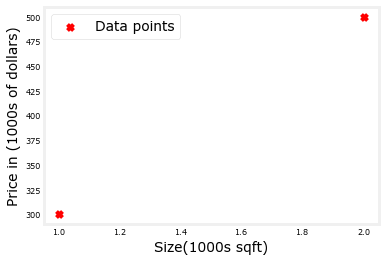

In [9]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32) #size in 1000 square feet
y_train = np.array([[300.0], [500.0]], dtype=np.float32)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, y_train, marker='x', c='r', label="Data points")
ax.legend(fontsize='xx-large')
ax.set_ylabel('Price in (1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size(1000s sqft)', fontsize='xx-large')
plt.show()

In [10]:
#Linear regression model

linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear')

In [11]:
#Examine the weights (No west instantiated)

linear_layer.get_weights()

[]

In [18]:
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1) #Result is a tensor with shape (1,1)

tf.Tensor([[-1.5]], shape=(1, 1), dtype=float32)


In [19]:
#Weights (w - weight (random small number), b-bias (zero))

w, b = linear_layer.get_weights()
print(f"w = {w}, b={b}")

w = [[-1.5]], b=[0.]


In [21]:
set_w = np.array([[200]])
set_b = np.array([100])

#set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [24]:
#Same results 

a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

alin = np.dot(set_w, X_train[0].reshape(1,1)) + set_b
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [25]:
#Predictions

prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w) + set_b

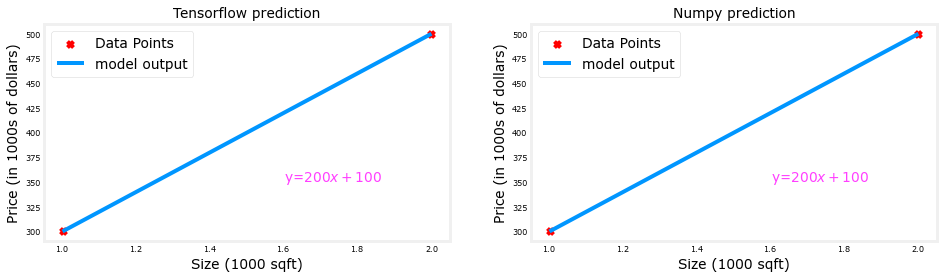

In [26]:
plt_linear(X_train, y_train, prediction_tf, prediction_np)

# Neuron with sigmoid activation

In [41]:
#Dataset

X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1) #2-D matrix
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1) #2-D matrix

In [42]:
#Labeling

pos = y_train == 1
neg = y_train == 0
X_train[pos]

array([3., 4., 5.], dtype=float32)

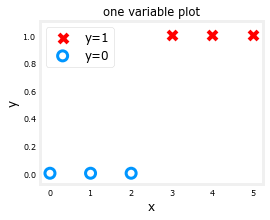

In [44]:
pos = y_train == 1
neg = y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('one variable plot')
ax.legend(fontsize=12)
plt.show()

In [45]:
#Logistic Neuron (with sigmoid activation)

model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
    ]
)



In [46]:
model.summary() #One layer, one Unit, two params

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Starting params

logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape, b.shape)

[[1.6]] [0.]
(1, 1) (1,)


In [50]:
#Setting params

set_w = np.array([[2]])
set_b = np.array([-4.5])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [51]:
#Comparing outputs

a1 = model.predict(X_train[0].reshape(1,1))
print(a1)

alog = sigmoidnp(np.dot(set_w, X_train[0].reshape(-1,1)) + set_b)
print(alog)

[[0.01]]
[[0.01]]


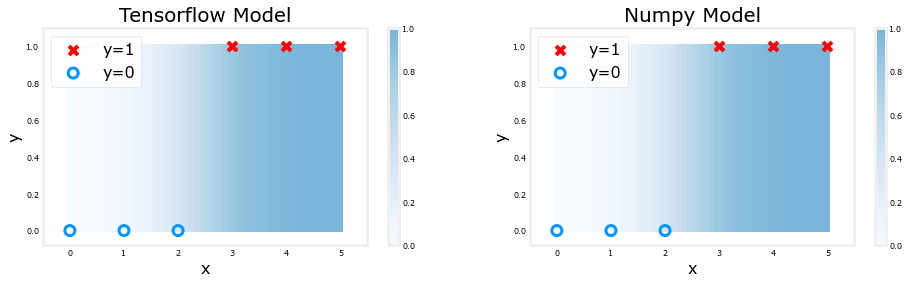

In [53]:
plt_logistic(X_train, y_train, model, set_w, set_b, pos, neg)